In [2]:
source("/secure/projects/HTAPP_MBC/src/init_phase2.R")

Loading combined annotation: annot


In [3]:
library("pathwayPCA")

In [4]:
wd=paste0(analysisDir,"/02_signatures/")
dir.create(wd)

Warning message in dir.create(wd):
"'/scratch/projects/HTAPP_MBC//phase2/analysis//02_signatures' already exists"

In [ ]:
load(paste0(baseDir,"/PyCache/fresh_selected_raw.Rdata"))
fresh=so

In [4]:
load(paste0(baseDir,"/PyCache/frozen_TST_selected_raw.Rdata"))
frozen=so

In [5]:
rm(so)

In [8]:
sets=read_gmt(paste0(codeDir,"/meta/gene_sets/h.all.v7.5.1.symbols.gmt"))

In [9]:
hallmarks=sets$pathways
names(hallmarks)=sets$TERMS

In [10]:
fresh_mal=subset(fresh,subset=compartments=="Malignant")
rm(fresh)
fresh_mal=NormalizeData(fresh_mal)

In [11]:
frozen_mal=subset(frozen,subset=compartments=="Malignant")
rm(frozen)
frozen_mal=NormalizeData(frozen_mal)

In [12]:
add_scores=function(so,set){
        for (gset in names(set)){
            print(gset)
            so=AddModuleScore(so,set[gset],name = gset,search = TRUE)
            names(so@meta.data)[grepl(gset,names(so@meta.data),fixed = T)] <- gset
            }
    return(so)
}

In [12]:
add_expression=function(so,genes){
    gof=t(as.matrix(so@assays$RNA@data[genes,]))
    so=AddMetaData(so,metadata = as.data.frame(gof))
    return(so)
}

In [13]:
gof=c("ESR1","ERBB2","PGR", "EPCAM","KRT8","KRT18","KRT19","TRPS1")

In [14]:
fresh_mal=add_expression(fresh_mal,gof)
frozen_mal=add_expression(frozen_mal,gof)

In [15]:
write.table(as.data.table(fresh_mal@meta.data),paste0(wd,"/fresh_goi_meta.tsv"),sep="\t",quote=FALSE,row.names=FALSE)
write.table(as.data.table(frozen_mal@meta.data),paste0(wd,"/frozen_goi_meta.tsv"),sep="\t",quote=FALSE,row.names=FALSE)

In [13]:
frozen_mal=add_scores(frozen_mal,hallmarks)

[1] "HALLMARK_TNFA_SIGNALING_VIA_NFKB"


Warning message:
"The following features are not present in the object: CCN1, FUT4, attempting to find updated synonyms"Found updated symbols for 1 symbols
CCN1 -> CCNA2
Warning message:
"The following features are still not present in the object: FUT4"

[1] "HALLMARK_HYPOXIA"


Warning message:
"The following features are not present in the object: ALDOC, CCN5, CCN1, CCN2, HOXB9, attempting to find updated synonyms"Found updated symbols for 1 symbols
CCN1 -> CCNA2
Warning message:
"The following features are still not present in the object: ALDOC, CCN5, CCN2, HOXB9"

[1] "HALLMARK_CHOLESTEROL_HOMEOSTASIS"


Warning message:
"The following features are not present in the object: ALDOC, NIBAN1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: ALDOC, NIBAN1"

[1] "HALLMARK_MITOTIC_SPINDLE"


Warning message:
"The following features are not present in the object: SEPTIN9, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: SEPTIN9"

[1] "HALLMARK_WNT_BETA_CATENIN_SIGNALING"
[1] "HALLMARK_TGF_BETA_SIGNALING"
[1] "HALLMARK_IL6_JAK_STAT3_SIGNALING"


Warning message:
"The following features are not present in the object: ITGB3, IRF9, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: ITGB3, IRF9"

[1] "HALLMARK_DNA_REPAIR"


Warning message:
"The following features are not present in the object: TAF9, POLR1H, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: TAF9, POLR1H"

[1] "HALLMARK_G2M_CHECKPOINT"


Warning message:
"The following features are not present in the object: H2AX, H2AZ1, H2BC12, PTTG3P, H2AZ2, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: H2AX, H2AZ1, H2BC12, PTTG3P, H2AZ2"

[1] "HALLMARK_APOPTOSIS"


Warning message:
"The following features are not present in the object: GPX1, PPP3R1, H1-0, GSTM1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: GPX1, PPP3R1, H1-0, GSTM1"

[1] "HALLMARK_NOTCH_SIGNALING"
[1] "HALLMARK_ADIPOGENESIS"


Warning message:
"The following features are not present in the object: MTARC2, ATP5PO, SLC66A3, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: MTARC2, ATP5PO, SLC66A3"

[1] "HALLMARK_ESTROGEN_RESPONSE_EARLY"


Warning message:
"The following features are not present in the object: CCN5, PLAAT3, UNC119, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: CCN5, PLAAT3, UNC119"

[1] "HALLMARK_ESTROGEN_RESPONSE_LATE"


Warning message:
"The following features are not present in the object: CCN5, SERPINA3, PLAAT3, GFUS, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: CCN5, SERPINA3, PLAAT3, GFUS"

[1] "HALLMARK_ANDROGEN_RESPONSE"


Warning message:
"The following features are not present in the object: H1-0, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: H1-0"

[1] "HALLMARK_MYOGENESIS"


Warning message:
"The following features are not present in the object: SCHIP1, DENND2B, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: SCHIP1, DENND2B"

[1] "HALLMARK_PROTEIN_SECRETION"


Warning message:
"The following features are not present in the object: DOP1A, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: DOP1A"

[1] "HALLMARK_INTERFERON_ALPHA_RESPONSE"


Warning message:
"The following features are not present in the object: IFITM1, IRF9, WARS1, IFI30, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: IFITM1, IRF9, WARS1, IFI30"

[1] "HALLMARK_INTERFERON_GAMMA_RESPONSE"


Warning message:
"The following features are not present in the object: IRF9, WARS1, MARCHF1, IFI30, KLRK1, IFNAR2, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: IRF9, WARS1, MARCHF1, IFI30, KLRK1, IFNAR2"

[1] "HALLMARK_APICAL_JUNCTION"


Warning message:
"The following features are not present in the object: CLDN11, PALS1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: CLDN11, PALS1"

[1] "HALLMARK_APICAL_SURFACE"
[1] "HALLMARK_HEDGEHOG_SIGNALING"
[1] "HALLMARK_COMPLEMENT"


Warning message:
"The following features are not present in the object: ANG, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: ANG"

[1] "HALLMARK_UNFOLDED_PROTEIN_RESPONSE"


Warning message:
"The following features are not present in the object: IARS1, TARS1, H2AX, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: IARS1, TARS1, H2AX"

[1] "HALLMARK_PI3K_AKT_MTOR_SIGNALING"


Warning message:
"The following features are not present in the object: AKT1S1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: AKT1S1"

[1] "HALLMARK_MTORC1_SIGNALING"


Warning message:
"The following features are not present in the object: WARS1, IFI30, NIBAN1, EPRS1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: WARS1, IFI30, NIBAN1, EPRS1"

[1] "HALLMARK_E2F_TARGETS"


Warning message:
"The following features are not present in the object: H2AZ1, H2AX, SPAG5, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: H2AZ1, H2AX, SPAG5"

[1] "HALLMARK_MYC_TARGETS_V1"


Warning message:
"The following features are not present in the object: IARS1, KARS1, H2AZ1, EPRS1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: IARS1, KARS1, H2AZ1, EPRS1"

[1] "HALLMARK_MYC_TARGETS_V2"


Warning message:
"The following features are not present in the object: PPAN, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: PPAN"

[1] "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"


Warning message:
"The following features are not present in the object: CCN2, CCN1, ITGB3, attempting to find updated synonyms"Found updated symbols for 1 symbols
CCN1 -> CCNA2
Warning message:
"The following features are still not present in the object: CCN2, ITGB3"

[1] "HALLMARK_INFLAMMATORY_RESPONSE"


Warning message:
"The following features are not present in the object: CYBB, IFITM1, ITGB3, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: CYBB, IFITM1, ITGB3"

[1] "HALLMARK_XENOBIOTIC_METABOLISM"


Warning message:
"The following features are not present in the object: KARS1, GSTT2, G6PC1, MARCHF6, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: KARS1, GSTT2, G6PC1, MARCHF6"

[1] "HALLMARK_FATTY_ACID_METABOLISM"


Warning message:
"The following features are not present in the object: MIX23, H2AZ1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: MIX23, H2AZ1"

[1] "HALLMARK_OXIDATIVE_PHOSPHORYLATION"


Warning message:
"The following features are not present in the object: NDUFA9, ATP5PO, ATP5MF, ATP6V0C, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: NDUFA9, ATP5PO, ATP5MF, ATP6V0C"

[1] "HALLMARK_GLYCOLYSIS"


Warning message:
"The following features are not present in the object: GFUS, RARS1, ANG, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: GFUS, RARS1, ANG"

[1] "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"


Warning message:
"The following features are not present in the object: PRDX2, EGLN2, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: PRDX2, EGLN2"

[1] "HALLMARK_P53_PATHWAY"


Warning message:
"The following features are not present in the object: H2AW, H2AJ, IFI30, IRAG2, H1-2, attempting to find updated synonyms"Found updated symbols for 1 symbols
H2AW -> H2AC25
Warning message:
"The following features are still not present in the object: H2AC25, H2AJ, IFI30, IRAG2, H1-2"

[1] "HALLMARK_UV_RESPONSE_UP"


Warning message:
"The following features are not present in the object: H2AX, TARS1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: H2AX, TARS1"

[1] "HALLMARK_UV_RESPONSE_DN"


Warning message:
"The following features are not present in the object: DMAC2L, CCN1, SCHIP1, ITGB3, attempting to find updated synonyms"Found updated symbols for 1 symbols
CCN1 -> CCNA2
Warning message:
"The following features are still not present in the object: DMAC2L, SCHIP1, ITGB3"

[1] "HALLMARK_ANGIOGENESIS"
[1] "HALLMARK_HEME_METABOLISM"


Warning message:
"The following features are not present in the object: MARCHF8, XK, H1-0, CROCCP2, PRDX2, HBZ, H4C3, HBBP1, MARCHF2, SLC66A2, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: MARCHF8, XK, H1-0, CROCCP2, PRDX2, HBZ, H4C3, HBBP1, MARCHF2, SLC66A2"

[1] "HALLMARK_COAGULATION"


Warning message:
"The following features are not present in the object: ITGB3, APOC2, ANG, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: ITGB3, APOC2, ANG"

[1] "HALLMARK_IL2_STAT5_SIGNALING"


Warning message:
"The following features are not present in the object: FLT3LG, CAPN3, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: FLT3LG, CAPN3"

[1] "HALLMARK_BILE_ACID_METABOLISM"
[1] "HALLMARK_PEROXISOME"
[1] "HALLMARK_ALLOGRAFT_REJECTION"


Warning message:
"The following features are not present in the object: TLR6, IFNAR2, WARS1, RARS1, AARS1, DARS1, TAP2, attempting to find updated synonyms"Found updated symbols for 1 symbols
TAP2 -> SEC14L3
Warning message:
"The following features are still not present in the object: TLR6, IFNAR2, WARS1, RARS1, AARS1, DARS1"

[1] "HALLMARK_SPERMATOGENESIS"


Warning message:
"The following features are not present in the object: PDHA2, PRM2, PAPOLB, AKAP4, DNAJB8, ZNRF4, TNP2, HBZ, H1-6, MTNR1A, CHRM4, SEPTIN4, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: PDHA2, PRM2, PAPOLB, AKAP4, DNAJB8, ZNRF4, TNP2, HBZ, H1-6, MTNR1A, CHRM4, SEPTIN4"

[1] "HALLMARK_KRAS_SIGNALING_UP"


Warning message:
"The following features are not present in the object: IGF2, PEG3, H2BC3, SERPINA3, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: IGF2, PEG3, H2BC3, SERPINA3"

[1] "HALLMARK_KRAS_SIGNALING_DN"


Warning message:
"The following features are not present in the object: TAS2R4, CYP11B2, MACROH2A2, SSTR4, VPREB1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: TAS2R4, CYP11B2, MACROH2A2, SSTR4, VPREB1"

[1] "HALLMARK_PANCREAS_BETA_CELLS"


Warning message:
"The following features are not present in the object: NEUROD1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: NEUROD1"

In [100]:
mt_frozen_dt=as.data.table(frozen_mal@meta.data)
write.table(mt_frozen_dt,paste0(wd,"/frozen_hallmark_meta.tsv"),sep="\t",quote=FALSE,row.names=FALSE)

In [15]:
fresh_mal=add_scores(fresh_mal,hallmarks)

[1] "HALLMARK_TNFA_SIGNALING_VIA_NFKB"


Warning message:
"The following features are not present in the object: CCN1, attempting to find updated synonyms"Found updated symbols for 1 symbols
CCN1 -> CCNA2


[1] "HALLMARK_HYPOXIA"


Warning message:
"The following features are not present in the object: CCN5, CCN1, CCN2, LALBA, attempting to find updated synonyms"Found updated symbols for 1 symbols
CCN1 -> CCNA2
Warning message:
"The following features are still not present in the object: CCN5, CCN2, LALBA"

[1] "HALLMARK_CHOLESTEROL_HOMEOSTASIS"


Warning message:
"The following features are not present in the object: NIBAN1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: NIBAN1"

[1] "HALLMARK_MITOTIC_SPINDLE"


Warning message:
"The following features are not present in the object: SEPTIN9, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: SEPTIN9"

[1] "HALLMARK_WNT_BETA_CATENIN_SIGNALING"
[1] "HALLMARK_TGF_BETA_SIGNALING"
[1] "HALLMARK_IL6_JAK_STAT3_SIGNALING"
[1] "HALLMARK_DNA_REPAIR"


Warning message:
"The following features are not present in the object: POLR1H, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: POLR1H"

[1] "HALLMARK_G2M_CHECKPOINT"


Warning message:
"The following features are not present in the object: H2AX, H2AZ1, H2BC12, PTTG3P, H2AZ2, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: H2AX, H2AZ1, H2BC12, PTTG3P, H2AZ2"

[1] "HALLMARK_APOPTOSIS"


Warning message:
"The following features are not present in the object: GPX1, H1-0, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: GPX1, H1-0"

[1] "HALLMARK_NOTCH_SIGNALING"
[1] "HALLMARK_ADIPOGENESIS"


Warning message:
"The following features are not present in the object: MTARC2, SLC66A3, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: MTARC2, SLC66A3"

[1] "HALLMARK_ESTROGEN_RESPONSE_EARLY"


Warning message:
"The following features are not present in the object: CCN5, PLAAT3, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: CCN5, PLAAT3"

[1] "HALLMARK_ESTROGEN_RESPONSE_LATE"


Warning message:
"The following features are not present in the object: CCN5, PLAAT3, GFUS, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: CCN5, PLAAT3, GFUS"

[1] "HALLMARK_ANDROGEN_RESPONSE"


Warning message:
"The following features are not present in the object: H1-0, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: H1-0"

[1] "HALLMARK_MYOGENESIS"


Warning message:
"The following features are not present in the object: MYH2, MYH4, DENND2B, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: MYH2, MYH4, DENND2B"

[1] "HALLMARK_PROTEIN_SECRETION"


Warning message:
"The following features are not present in the object: DOP1A, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: DOP1A"

[1] "HALLMARK_INTERFERON_ALPHA_RESPONSE"


Warning message:
"The following features are not present in the object: WARS1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: WARS1"

[1] "HALLMARK_INTERFERON_GAMMA_RESPONSE"


Warning message:
"The following features are not present in the object: WARS1, MARCHF1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: WARS1, MARCHF1"

[1] "HALLMARK_APICAL_JUNCTION"


Warning message:
"The following features are not present in the object: PALS1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: PALS1"

[1] "HALLMARK_APICAL_SURFACE"


Warning message:
"The following features are not present in the object: SLC22A12, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: SLC22A12"

[1] "HALLMARK_HEDGEHOG_SIGNALING"
[1] "HALLMARK_COMPLEMENT"
[1] "HALLMARK_UNFOLDED_PROTEIN_RESPONSE"


Warning message:
"The following features are not present in the object: IARS1, TARS1, H2AX, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: IARS1, TARS1, H2AX"

[1] "HALLMARK_PI3K_AKT_MTOR_SIGNALING"


Warning message:
"The following features are not present in the object: FGF6, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: FGF6"

[1] "HALLMARK_MTORC1_SIGNALING"


Warning message:
"The following features are not present in the object: WARS1, NIBAN1, EPRS1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: WARS1, NIBAN1, EPRS1"

[1] "HALLMARK_E2F_TARGETS"


Warning message:
"The following features are not present in the object: H2AZ1, H2AX, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: H2AZ1, H2AX"

[1] "HALLMARK_MYC_TARGETS_V1"


Warning message:
"The following features are not present in the object: IARS1, KARS1, H2AZ1, EPRS1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: IARS1, KARS1, H2AZ1, EPRS1"

[1] "HALLMARK_MYC_TARGETS_V2"
[1] "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"


Warning message:
"The following features are not present in the object: CCN2, CCN1, attempting to find updated synonyms"Found updated symbols for 1 symbols
CCN1 -> CCNA2
Warning message:
"The following features are still not present in the object: CCN2"

[1] "HALLMARK_INFLAMMATORY_RESPONSE"
[1] "HALLMARK_XENOBIOTIC_METABOLISM"


Warning message:
"The following features are not present in the object: KARS1, ADH7, GSTT2, G6PC1, MARCHF6, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: KARS1, ADH7, GSTT2, G6PC1, MARCHF6"

[1] "HALLMARK_FATTY_ACID_METABOLISM"


Warning message:
"The following features are not present in the object: MIX23, ADH7, H2AZ1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: MIX23, ADH7, H2AZ1"

[1] "HALLMARK_OXIDATIVE_PHOSPHORYLATION"
[1] "HALLMARK_GLYCOLYSIS"


Warning message:
"The following features are not present in the object: GFUS, RARS1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: GFUS, RARS1"

[1] "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"
[1] "HALLMARK_P53_PATHWAY"


Warning message:
"The following features are not present in the object: H2AW, H2AJ, IRAG2, H1-2, attempting to find updated synonyms"Found updated symbols for 1 symbols
H2AW -> H2AC25
Warning message:
"The following features are still not present in the object: H2AC25, H2AJ, IRAG2, H1-2"

[1] "HALLMARK_UV_RESPONSE_UP"


Warning message:
"The following features are not present in the object: H2AX, TARS1, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: H2AX, TARS1"

[1] "HALLMARK_UV_RESPONSE_DN"


Warning message:
"The following features are not present in the object: DMAC2L, CCN1, attempting to find updated synonyms"Found updated symbols for 1 symbols
CCN1 -> CCNA2
Warning message:
"The following features are still not present in the object: DMAC2L"

[1] "HALLMARK_ANGIOGENESIS"
[1] "HALLMARK_HEME_METABOLISM"


Warning message:
"The following features are not present in the object: MARCHF8, H1-0, CROCCP2, H4C3, HBBP1, MARCHF2, SLC66A2, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: MARCHF8, H1-0, CROCCP2, H4C3, HBBP1, MARCHF2, SLC66A2"

[1] "HALLMARK_COAGULATION"
[1] "HALLMARK_IL2_STAT5_SIGNALING"
[1] "HALLMARK_BILE_ACID_METABOLISM"
[1] "HALLMARK_PEROXISOME"
[1] "HALLMARK_ALLOGRAFT_REJECTION"


Warning message:
"The following features are not present in the object: WARS1, RARS1, AARS1, DARS1, IL9, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: WARS1, RARS1, AARS1, DARS1, IL9"

[1] "HALLMARK_SPERMATOGENESIS"


Warning message:
"The following features are not present in the object: PDHA2, PRM2, ODF1, ADAD1, AKAP4, CST8, DNAJB8, ZNRF4, TNP2, H1-6, CHRM4, SEPTIN4, HTR5A, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: PDHA2, PRM2, ODF1, ADAD1, AKAP4, CST8, DNAJB8, ZNRF4, TNP2, H1-6, CHRM4, SEPTIN4, HTR5A"

[1] "HALLMARK_KRAS_SIGNALING_UP"


Warning message:
"The following features are not present in the object: IGF2, H2BC3, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: IGF2, H2BC3"

[1] "HALLMARK_KRAS_SIGNALING_DN"


Warning message:
"The following features are not present in the object: NPY4R, CYP11B2, MACROH2A2, SSTR4, TSHB, PAX4, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: NPY4R, CYP11B2, MACROH2A2, SSTR4, TSHB, PAX4"

[1] "HALLMARK_PANCREAS_BETA_CELLS"


Warning message:
"The following features are not present in the object: NEUROG3, PAX4, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: NEUROG3, PAX4"

In [92]:
mt_fresh_dt=as.data.table(fresh_mal@meta.data)
write.table(mt_fresh_dt,paste0(wd,"/fresh_hallmark_meta.tsv"),sep="\t",quote=FALSE,row.names=FALSE)

### Plot

In [12]:
#create colors
library(colorspace)
create_colors=function(combined,columns=c("receptors_biopsy_simpl","site_biopsy"),palettes=c("ag_GrnYl","SunsetDark")){

    all_maps=c()
    n=1
    for (col in columns) {
        vals=sort(unique(unlist(combined[,col,with=FALSE])))
        vals=vals[!grepl("NA",vals)]
        cmap=sequential_hcl(length(vals), palette = palettes[n])
        names(cmap)=vals
        all_maps=c(all_maps,cmap)
        n=n+1
    }
    all_maps=c(all_maps)
    all_maps=c(all_maps,c("NA"="white"))
    return(all_maps)
}

In [6]:
create_hp_plot=function(dt,goi_factor=15){
    dt_long=melt(dt,id.vars = c("name","cell_type","receptors_biopsy","site_biopsy",gof),measure.vars = names(hallmarks))
    dt_long_red=dt_long[,.(ESR1=mean(ESR1),PGR=mean(PGR),ERBB2=mean(ERBB2),mean=mean(value),sd=sd(value),fraction=sum(value>0.3)/.N),by=c("name","variable","receptors_biopsy","site_biopsy")]
    dt_mat=data.frame(dcast(dt_long_red,variable~name,value.var = "mean"),row.names="variable",check.names = FALSE)

    hcl_hallmarks=hclust(dist(as.matrix(dt_mat)))
    hcl_samples=hclust(dist(as.matrix(t(dt_mat))))


    dt_long_red[,name:=factor(name,levels=hcl_samples$labels[hcl_samples$order]),]
    dt_long_red[,variable:=factor(variable,levels=hcl_hallmarks$labels[hcl_hallmarks$order]),]    

    dt_long_red=simplify_rec(dt_long_red)
    dt_long_red[,receptors_biopsy_simpl:=paste0(" ",receptors_biopsy_simpl),]
    dt_long_red[,receptors_biopsy_simpl:=factor(receptors_biopsy_simpl,levels=c(" HR+/HER2-", " HR+/HER2+", " HR-/HER2+", " HR-/HER2-")),]
    dt_long_red[,site_biopsy:=paste0("  ",site_biopsy),]
    
    cmaps=create_colors(dt_long_red)
    
    pl=ggplot(dt_long_red)+geom_point(aes(y=name,x=variable,size=sd,color=mean))+
    geom_tile(aes(y=name,x=-1,fill=receptors_biopsy_simpl))+
    geom_tile(aes(y=name,x=-2,fill=site_biopsy))+
    geom_point(aes(y=name,x=-3,color=ESR1/goi_factor),size=2)+
    geom_point(aes(y=name,x=-4,color=PGR/goi_factor),size=2)+
    geom_point(aes(y=name,x=-5,color=ERBB2/goi_factor),size=2)+
    geom_point(aes(y=name,x=-6),color="transparent")+
    rotate_labels()+scale_color_gradient2(low = "blue",mid="grey95",high="red")+scale_size_continuous(range = c(0.1,5))+
    scale_fill_manual(values=cmaps)+
    theme(legend.position="bottom")+
    guides(fill=guide_legend(ncol=5,title.position = "top"))+
    guides(size=guide_legend(ncol=2,title.position = "top"))+
    guides(col=guide_legend(ncol=2,title.position = "top"))
    
    return(pl)
}

In [ ]:
gof=c("ESR1","ERBB2","PGR")

In [5]:
mt_frozen_dt=fread(paste0(wd,"/frozen_hallmark_meta.tsv"))
mt_fresh_dt=fread(paste0(wd,"/fresh_hallmark_meta.tsv"))

png 
  2

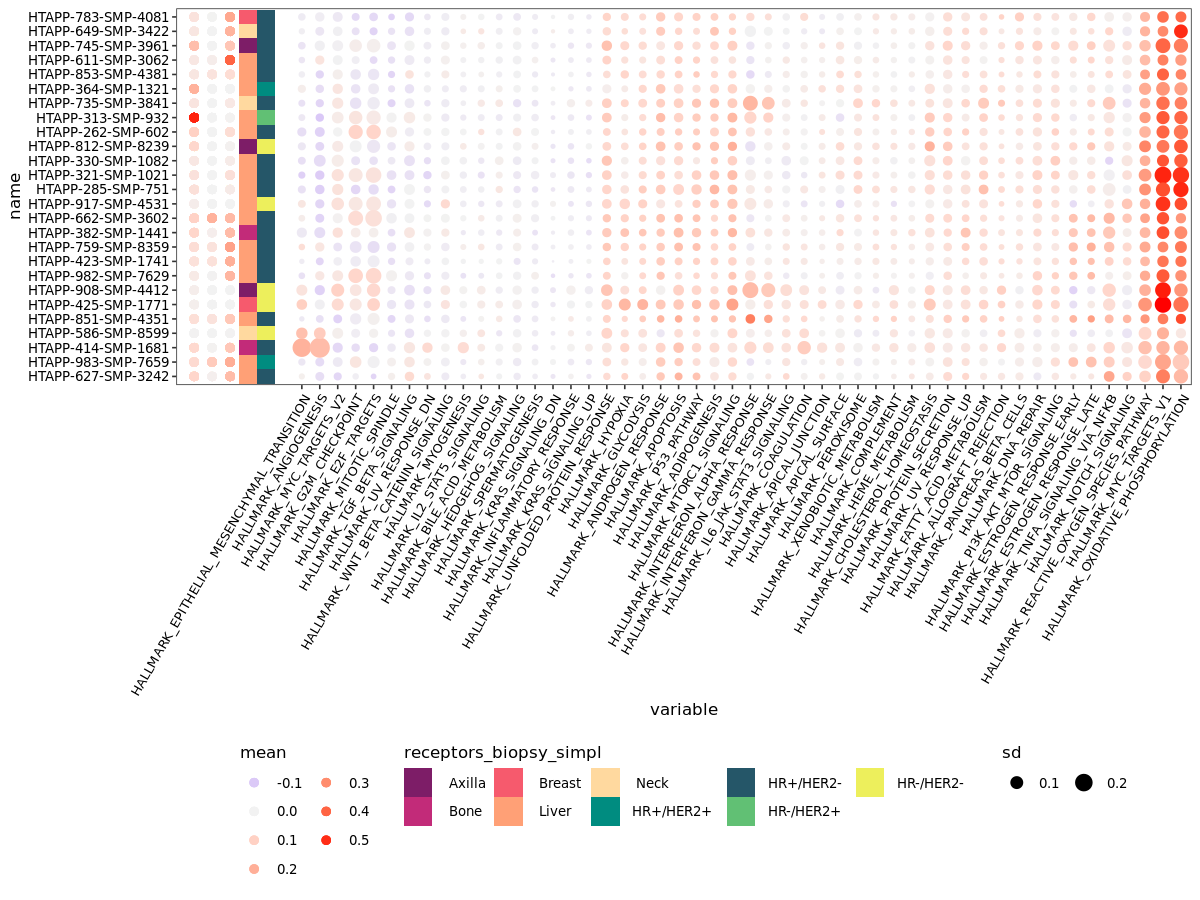

In [12]:
#fresh
pl=create_hp_plot(mt_fresh_dt,goi_factor = 5)
pdf(paste0(wd,"/fresh_hallmark.pdf"),height = 7.5,width=10)
pl
dev.off()
options(repr.plot.width = 10, repr.plot.height =7.5)
pl

png 
  2

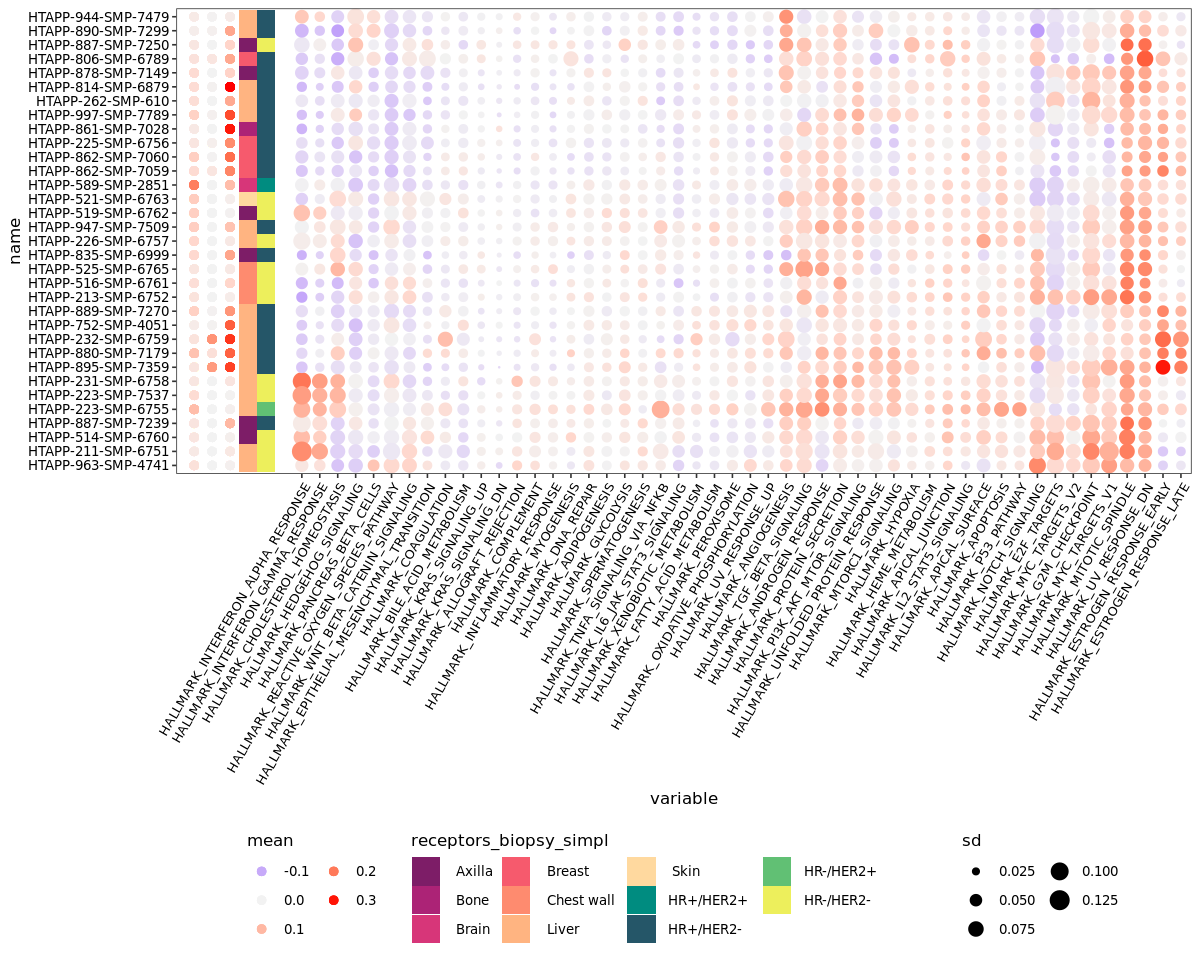

In [13]:
#frozen
pl=create_hp_plot(mt_frozen_dt)
pdf(paste0(wd,"/frozen_hallmark.pdf"),height = 7.5,width=10)
pl
dev.off()
options(repr.plot.width = 10, repr.plot.height =8)
pl

In [5]:
mt_frozen_goi_dt=fread(paste0(wd,"/frozen_goi_meta.tsv"))
mt_fresh_goi_dt=fread(paste0(wd,"/fresh_goi_meta.tsv"))

In [6]:
combined=rbindlist(list(mt_frozen_goi_dt,mt_fresh_goi_dt))

In [7]:
gof=c("ESR1","ERBB2","PGR", "EPCAM","KRT8","KRT18","KRT19","TRPS1")

In [8]:
combined=simplify_rec(combined)
dt_long=melt(combined,id.vars = c("name","condition","cell_type","receptors_biopsy_simpl","site_biopsy"),measure.vars = gof)

In [26]:
dt_long[,median:=median(value[variable=="ESR1"]),by=c("name")]
dt_long[,median_gene:=median(value),by=c("name","variable")]

In [10]:
dt_long[,receptors_biopsy_simpl:=factor(receptors_biopsy_simpl,levels=c("HR+/HER2-", "HR+/HER2+", "HR-/HER2+", "HR-/HER2-")),]
dt_long[,name:=factor(name,levels=unique(name[order(condition,receptors_biopsy_simpl,site_biopsy,median)])),]

In [13]:
cmaps=create_colors(dt_long)
cmaps=c(cmaps,c("TST"="grey","fresh"="black"))

png 
  2

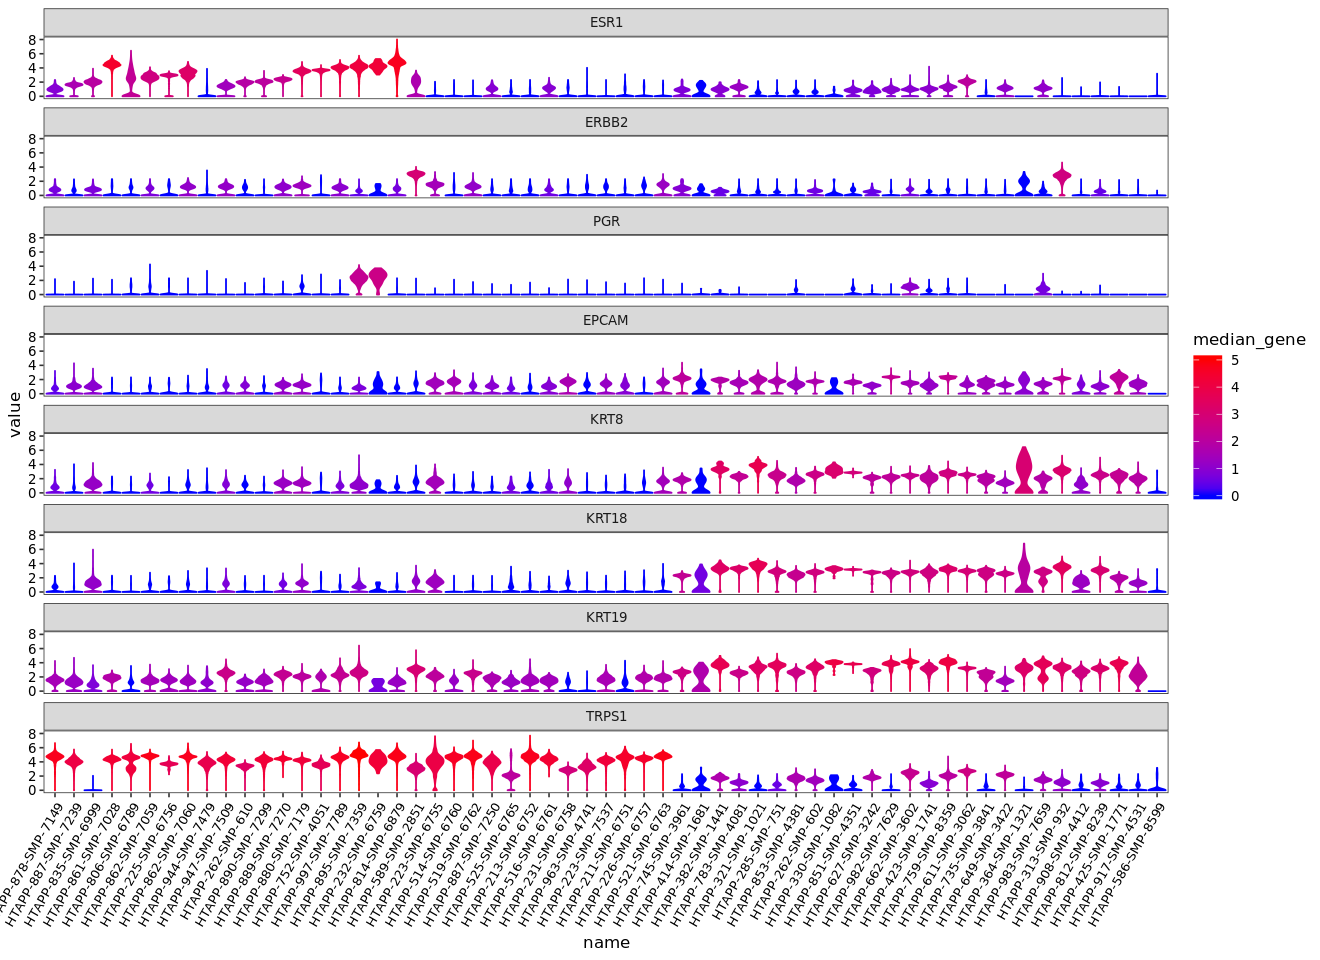

In [28]:
pl=ggplot(dt_long)+geom_violin(aes(y=value,x=name,fill=median_gene,col=median_gene),scale ="width")+
#geom_boxplot(aes(y=value,x=name),width=0.5,fill="transparent",outlier.size = -1)+
    rotate_labels()+
    facet_wrap(variable~.,ncol=1)+
    scale_fill_gradient(low="blue",high="red")+
    scale_color_gradient(low="blue",high="red")

pdf(paste0(wd,"/receptor_expresion.pdf"),height=8,width=11)
pl
dev.off()
options(repr.plot.width = 11, repr.plot.height =8)
pl

png 
  2

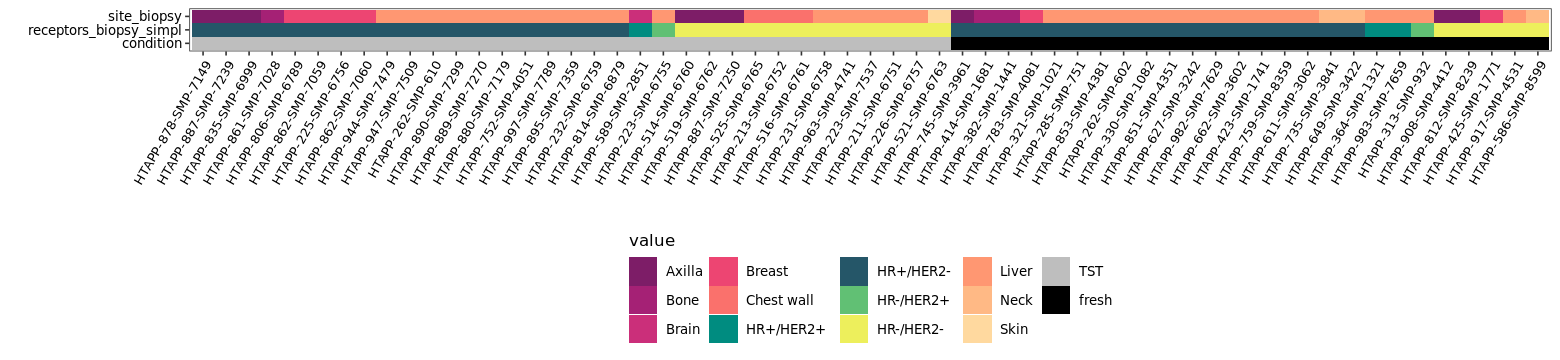

In [24]:
pl=ggplot(melt(unique(dt_long[,c("name","condition","receptors_biopsy_simpl","site_biopsy")]),id.vars = "name"))+
geom_tile(aes(x=name,y=variable, fill=value))+
rotate_labels()+
scale_fill_manual(values=cmaps)+
theme(legend.position="bottom")+
guides(fill=guide_legend(ncol=5,title.position = "top"))+xlab("")+ylab("")
pdf(paste0(wd,"/receptor_expresion_annot.pdf"),height=3,width=13)
pl
dev.off()
options(repr.plot.width = 13, repr.plot.height =3)
pl